<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest Algorithm
Random Forest is an ensemble learning technique that builds multiple decision trees and combines their outputs to improve accuracy and reduce overfitting. Instead of relying on a single tree, it takes the majority vote (classification) or average prediction (regression) from multiple trees.


#When to Use Random Forest?
✅ When you need better accuracy than a single decision tree.

✅ When the dataset is large and complex.

✅ When you want to reduce overfitting (since multiple trees prevent memorization).

✅ When interpretability is less important than performance.

#Key Concepts
1. Multiple Decision Trees

 - Instead of creating one tree, Random Forest builds many decision trees using different random subsets of the data.

2. Bootstrap Aggregating (Bagging)

 - Each tree is trained on a random subset of the dataset (sampling with replacement).

 - This helps reduce variance and improves generalization.

3. Feature Randomness

 - Each tree only considers a random subset of features to split on, making each tree unique.

4. Final Prediction

 - Classification: Takes the majority vote from all trees.
 - Regression: Takes the average of all tree predictions.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = {
    "Size_sqft": [500, 700, 800, 900, 1200, 1500, 1800, 2000, 2200, 2500],
    "Bedrooms": [1, 1, 2, 2, 3, 3, 3, 4, 4, 5],
    "Rent": [5000, 7000, 8500, 9000, 12000, 15000, 18000, 20000, 22000, 25000]  # Target variable
}

df = pd.DataFrame(data)

In [ ]:
df

,Size_sqft,Bedrooms,Rent
0,500,1,5000
1,700,1,7000
2,800,2,8500
3,900,2,9000
4,1200,3,12000
5,1500,3,15000
6,1800,3,18000
7,2000,4,20000
8,2200,4,22000
9,2500,5,25000


In [ ]:
# Step 2: Split Features and Target
X = df[["Size_sqft", "Bedrooms"]]  # Features
y = df["Rent"]  # Target (house rent)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=1500)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1500)

In [ ]:
X_test

,Size_sqft,Bedrooms
8,2200,4
1,700,1


In [ ]:
y_pred = rf_regressor.predict(X_test)
y_pred

array([19958.66666667,  7015.66666667])

In [ ]:
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1028.50
Mean Squared Error (MSE): 2083643.61
Root Mean Squared Error (RMSE): 1443.48
R² Score: 0.96


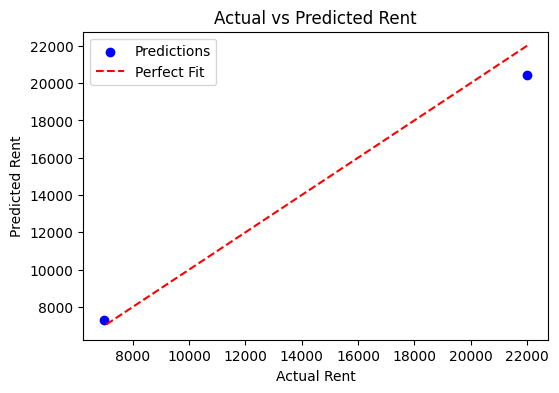

In [ ]:
 #Step 7: Visualizing Predictions vs Actual Values
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.legend()
plt.show()



---



#More features

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = {
    "Size_sqft": [500, 700, 800, 900, 1200, 1500, 1800, 2000, 2200, 2500],
    "Bedrooms": [1, 1, 2, 2, 3, 3, 3, 4, 4, 5],
    "Bathrooms": [1, 1, 1, 2, 2, 2, 3, 3, 3, 4],
    "Floor": [1, 2, 3, 1, 5, 3, 6, 10, 12, 15],
    "City": ["Chennai", "Bangalore", "Mumbai", "Chennai", "Delhi", "Mumbai", "Bangalore", "Delhi", "Chennai", "Mumbai"],
    "Furnished": [0, 1, 0, 1, 1, 1, 0, 1, 0, 1],  # 1 = Furnished, 0 = Unfurnished
    "Parking_Spots": [0, 1, 1, 2, 2, 1, 2, 3, 2, 3],
    "Rent": [5000, 7000, 8500, 9000, 12000, 15000, 18000, 20000, 22000, 25000]
}

df = pd.DataFrame(data)
df

,Size_sqft,Bedrooms,Bathrooms,Floor,City,Furnished,Parking_Spots,Rent
0,500,1,1,1,Chennai,0,0,5000
1,700,1,1,2,Bangalore,1,1,7000
2,800,2,1,3,Mumbai,0,1,8500
3,900,2,2,1,Chennai,1,2,9000
4,1200,3,2,5,Delhi,1,2,12000
5,1500,3,2,3,Mumbai,1,1,15000
6,1800,3,3,6,Bangalore,0,2,18000
7,2000,4,3,10,Delhi,1,3,20000
8,2200,4,3,12,Chennai,0,2,22000
9,2500,5,4,15,Mumbai,1,3,25000


In [ ]:
X = df.drop("Rent", axis=1)  # Features
y = df["Rent"]  # Target (house rent)

In [ ]:
X

,Size_sqft,Bedrooms,Bathrooms,Floor,City,Furnished,Parking_Spots
0,500,1,1,1,Chennai,0,0
1,700,1,1,2,Bangalore,1,1
2,800,2,1,3,Mumbai,0,1
3,900,2,2,1,Chennai,1,2
4,1200,3,2,5,Delhi,1,2
5,1500,3,2,3,Mumbai,1,1
6,1800,3,3,6,Bangalore,0,2
7,2000,4,3,10,Delhi,1,3
8,2200,4,3,12,Chennai,0,2
9,2500,5,4,15,Mumbai,1,3


In [ ]:
y

,Rent
0,5000
1,7000
2,8500
3,9000
4,12000
5,15000
6,18000
7,20000
8,22000
9,25000


In [ ]:
#converting Categorical to Numerical data
categorical_features = ["City"]
one_hot_encoder = ColumnTransformer(transformers=[("encoded", OneHotEncoder(drop="first"), categorical_features)], remainder="passthrough")

In [ ]:
X_encoded = one_hot_encoder.fit_transform(X)
X_encoded

array([[1.0e+00, 0.0e+00, 0.0e+00, 5.0e+02, 1.0e+00, 1.0e+00, 1.0e+00,
        0.0e+00, 0.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 7.0e+02, 1.0e+00, 1.0e+00, 2.0e+00,
        1.0e+00, 1.0e+00],
       [0.0e+00, 0.0e+00, 1.0e+00, 8.0e+02, 2.0e+00, 1.0e+00, 3.0e+00,
        0.0e+00, 1.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, 9.0e+02, 2.0e+00, 2.0e+00, 1.0e+00,
        1.0e+00, 2.0e+00],
       [0.0e+00, 1.0e+00, 0.0e+00, 1.2e+03, 3.0e+00, 2.0e+00, 5.0e+00,
        1.0e+00, 2.0e+00],
       [0.0e+00, 0.0e+00, 1.0e+00, 1.5e+03, 3.0e+00, 2.0e+00, 3.0e+00,
        1.0e+00, 1.0e+00],
       [0.0e+00, 0.0e+00, 0.0e+00, 1.8e+03, 3.0e+00, 3.0e+00, 6.0e+00,
        0.0e+00, 2.0e+00],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.0e+03, 4.0e+00, 3.0e+00, 1.0e+01,
        1.0e+00, 3.0e+00],
       [1.0e+00, 0.0e+00, 0.0e+00, 2.2e+03, 4.0e+00, 3.0e+00, 1.2e+01,
        0.0e+00, 2.0e+00],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.5e+03, 5.0e+00, 4.0e+00, 1.5e+01,
        1.0e+00, 3.0e+00]])

In [ ]:
#Step 4: Convert Encoded Data into DataFrame
encoded_feature_names = one_hot_encoder.get_feature_names_out()
X_encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names)

In [ ]:
X_encoded_df

,encoded__City_Chennai,encoded__City_Delhi,encoded__City_Mumbai,remainder__Size_sqft,remainder__Bedrooms,remainder__Bathrooms,remainder__Floor,remainder__Furnished,remainder__Parking_Spots
0,1.0,0.0,0.0,500.0,1.0,1.0,1.0,0.0,0.0
1,0.0,0.0,0.0,700.0,1.0,1.0,2.0,1.0,1.0
2,0.0,0.0,1.0,800.0,2.0,1.0,3.0,0.0,1.0
3,1.0,0.0,0.0,900.0,2.0,2.0,1.0,1.0,2.0
4,0.0,1.0,0.0,1200.0,3.0,2.0,5.0,1.0,2.0
5,0.0,0.0,1.0,1500.0,3.0,2.0,3.0,1.0,1.0
6,0.0,0.0,0.0,1800.0,3.0,3.0,6.0,0.0,2.0
7,0.0,1.0,0.0,2000.0,4.0,3.0,10.0,1.0,3.0
8,1.0,0.0,0.0,2200.0,4.0,3.0,12.0,0.0,2.0
9,0.0,0.0,1.0,2500.0,5.0,4.0,15.0,1.0,3.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=50)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [ ]:
y_pred = rf_regressor.predict(X_test)

In [ ]:
y_test

,Rent
8,22000
1,7000


In [ ]:
y_pred

array([19520.,  7930.])

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print Evaluation Metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 1705.00
Mean Squared Error (MSE): 3507650.00
Root Mean Squared Error (RMSE): 1872.87
R² Score: 0.94


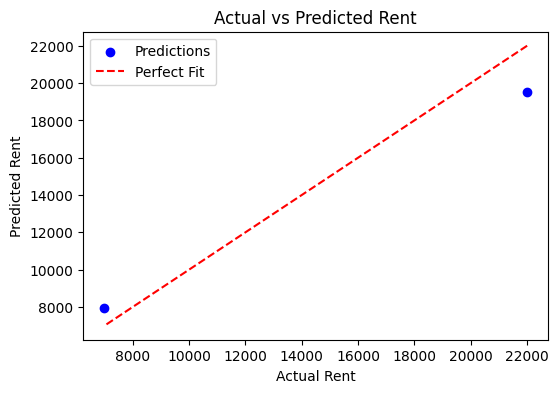

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color="blue", label="Predictions")
plt.plot(y_test, y_test, color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.legend()
plt.show()